In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score, make_scorer
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


In [3]:
file_path = "filtered_data.csv"
filtered_data = pd.read_csv(file_path)
log_foldChange = filtered_data["log2_foldchange"]

embeddings = np.load('all_embeddings.npy')

## With Training Data

In [5]:
train_data = pd.read_csv('train_data.csv')
features = train_data.iloc[:, 2:]
log_foldChange = train_data["log2_foldchange"]

In [6]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Method 1: Linear Regression

Mean Squared Error: 0.7233376617468014
R2 Score: 0.09615887674079804
MAE Score: 0.6171626963191313


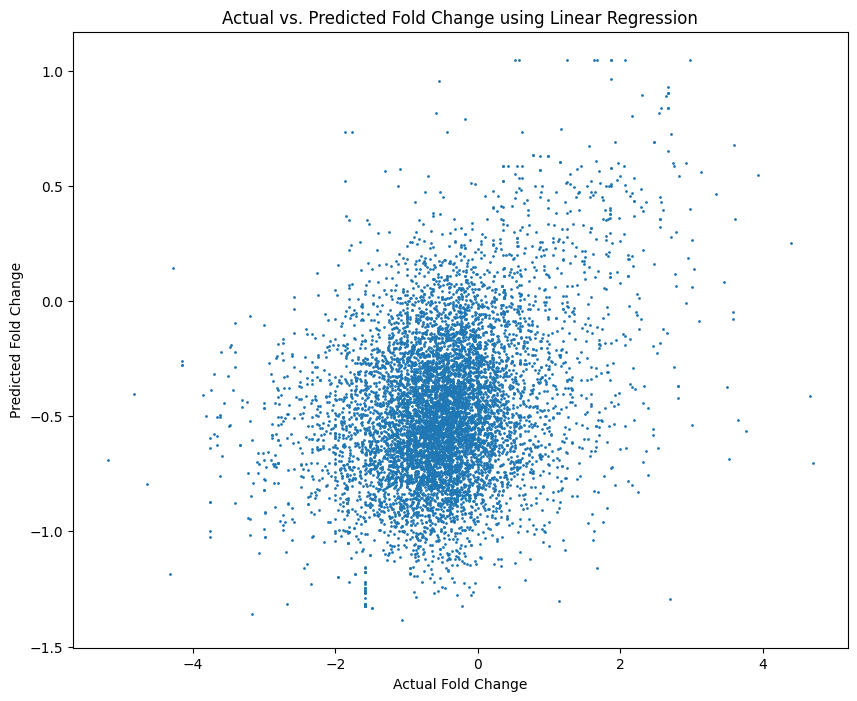

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, lr_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, lr_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Linear Regression')
plt.show()

## Method 2: Random Forest

Mean Squared Error: 0.5977803337711294
R2 Score: 0.2530480895558769
MAE Score: 0.5035119769959143


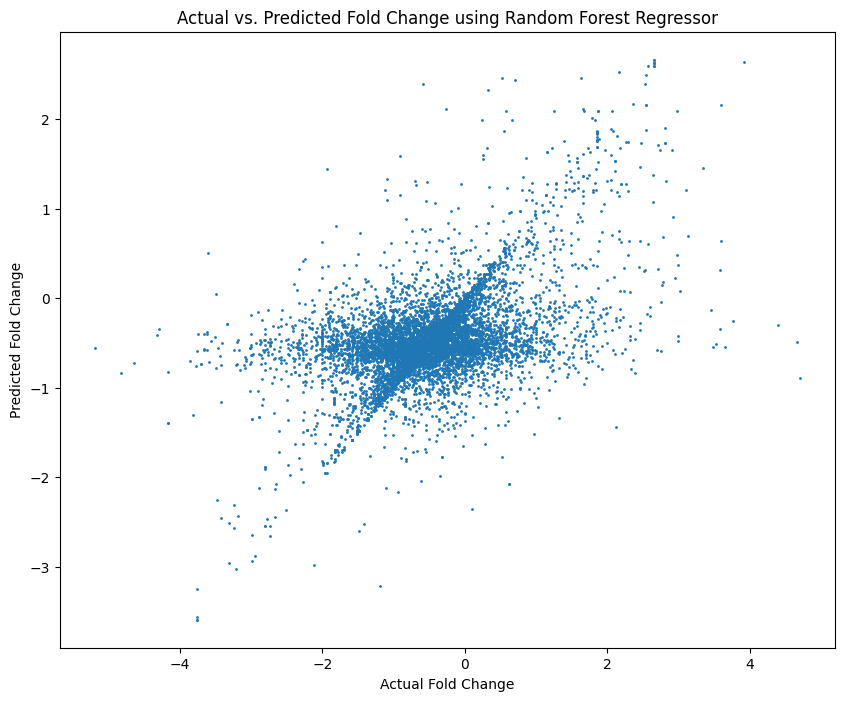

In [14]:
rfe_model = RandomForestRegressor()
rfe_model.fit(X_train, y_train)
rfe_pred = rfe_model.predict(X_test)

mse = mean_squared_error(y_test, rfe_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, rfe_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, rfe_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, rfe_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()

## Method 3: SVR

Mean Squared Error: 0.7356190508795096
MAE Score: 0.6059739703781525
R2 Score: 0.080812759517918


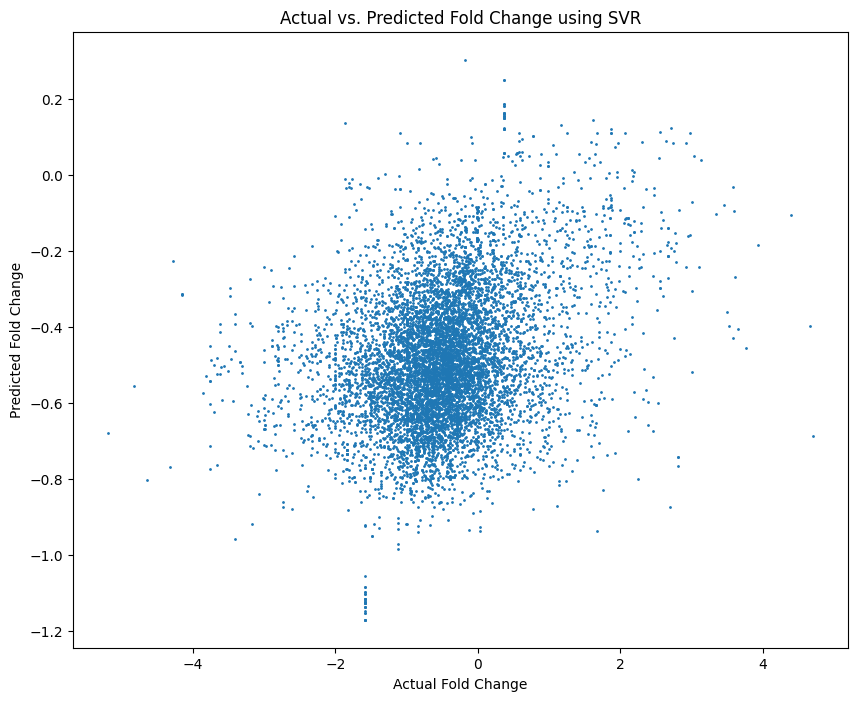

In [15]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, svr_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, svr_pred)
print(f'MAE Score: {mae}')

r2_score = r2_score(y_test, svr_pred)
print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, svr_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using SVR')
plt.show()

## Method 4: Gradient Boosting

Mean Squared Error: 0.6819034396566488
MAE Score: 0.5929017533398719


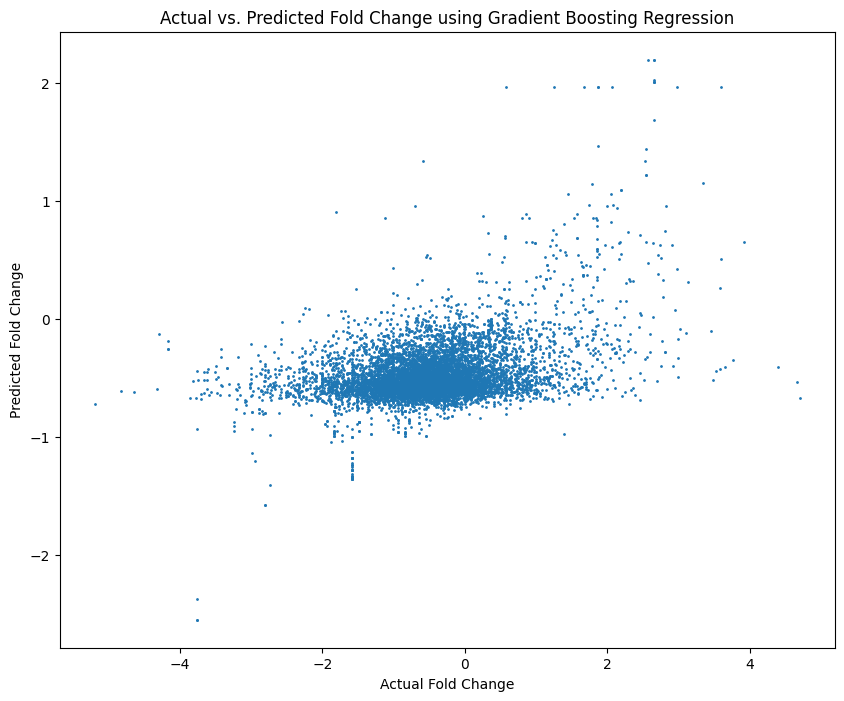

In [18]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, gb_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, gb_pred)
print(f'MAE Score: {mae}')

# r2_score = r2_score(y_test, gb_pred)
# print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, gb_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Gradient Boosting Regression')
plt.show()

## Determining TPR, Precision, Recall, Specifity, and Sensitivity given best Regression Method

True Positive Rate: 0.667910447761194
Precision: 0.4172494172494173
Recall: 0.4004474272930649
Specificity: 0.9359631147540983
Sensitivity: 0.4004474272930649


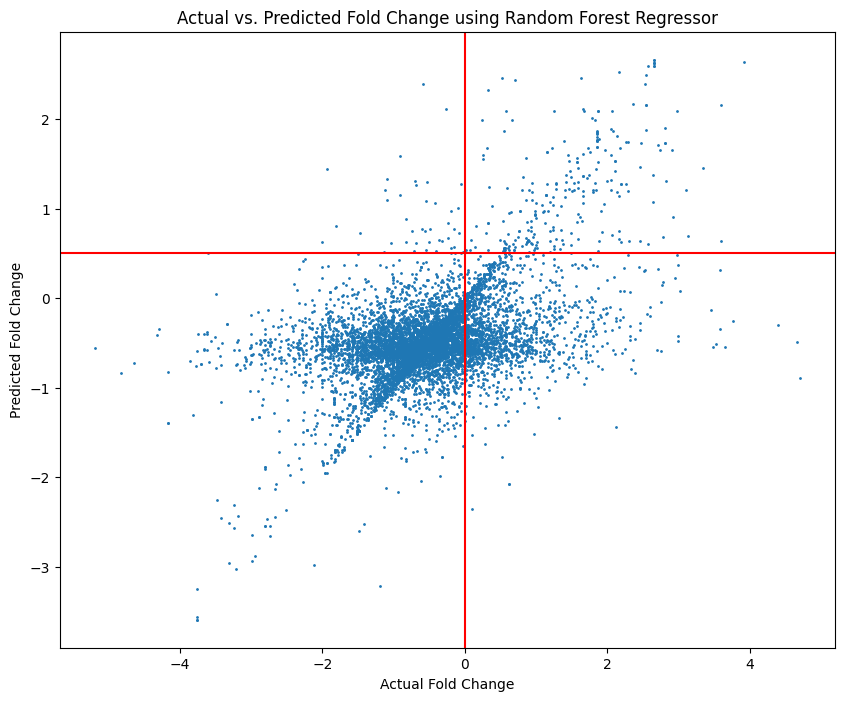

In [17]:
# Cutoff values
cutoff_y = 0.5
cutoff_x = 0

y_test_np = np.array(y_test)

# Calculate the number of points in each quadrant
TP = np.sum((y_test_np >= cutoff_y) & (rfe_pred >= cutoff_x))
FP = np.sum((y_test_np < cutoff_y) & (rfe_pred >= cutoff_x))
TN = np.sum((y_test_np < cutoff_y) & (rfe_pred < cutoff_x))
FN = np.sum((y_test_np >= cutoff_y) & (rfe_pred < cutoff_x))

TPR = TP/FN
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = TN/(TN+FP)
sens = TP/(TP+FN)

# Print the calculated values
print(f"True Positive Rate: {TPR}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, rfe_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.axhline(y=cutoff_y, color='r', linestyle='-')
plt.axvline(x=cutoff_x, color='r', linestyle='-')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()

# Try downsampling the data

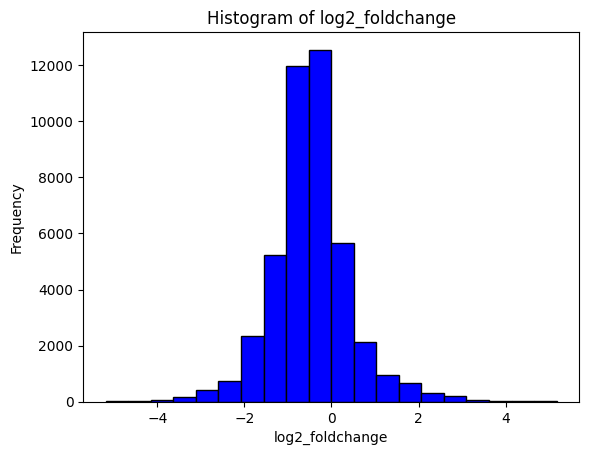

In [7]:
# Plot histogram
plt.hist(train_data['log2_foldchange'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of log2_foldchange')
plt.xlabel('log2_foldchange')
plt.ylabel('Frequency')
plt.show()

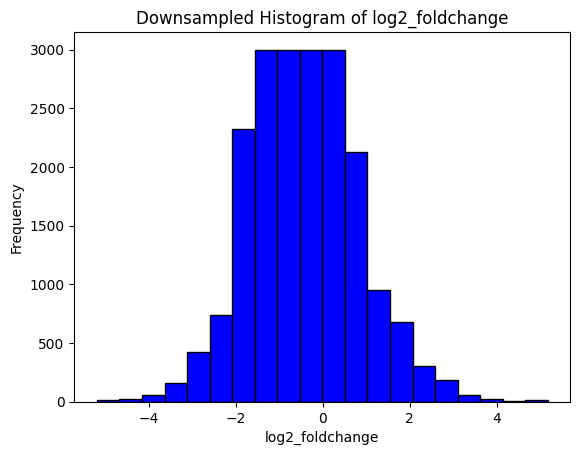

In [9]:
# Plot histogram
hist, edges = np.histogram(train_data['log2_foldchange'], bins=20)

# Identify bars with more than 3000 entries
high_count_bars = np.where(hist > 3000)[0]

# Downsample the high count bars to have a max of 3000 entries
downsampled_data = []
for i in range(len(edges) - 1):
    if i in high_count_bars:
        bin_data = train_data[(train_data['log2_foldchange'] >= edges[i]) & (train_data['log2_foldchange'] <= edges[i+1])]
        downsampled_data.append(bin_data.sample(n=3000, replace=True))
    else:
        bin_data = train_data[(train_data['log2_foldchange'] >= edges[i]) & (train_data['log2_foldchange'] <= edges[i+1])]
        downsampled_data.append(bin_data)

# Concatenate the downsampled data to obtain the final dataframe
downsampled_df = pd.concat(downsampled_data)
downsampled_df = downsampled_df.reset_index(drop=True)

# Plot the downsampled histogram
plt.hist(downsampled_df['log2_foldchange'], bins=20, color='blue', edgecolor='black')
plt.title('Downsampled Histogram of log2_foldchange')
plt.xlabel('log2_foldchange')
plt.ylabel('Frequency')
plt.show()


In [10]:
X = downsampled_df.drop(columns = ['seq','log2_foldchange'])
y = downsampled_df['log2_foldchange'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 1.1332238711668468
R2 Score: 0.0846753256285584
MAE Score: 0.819660507217062


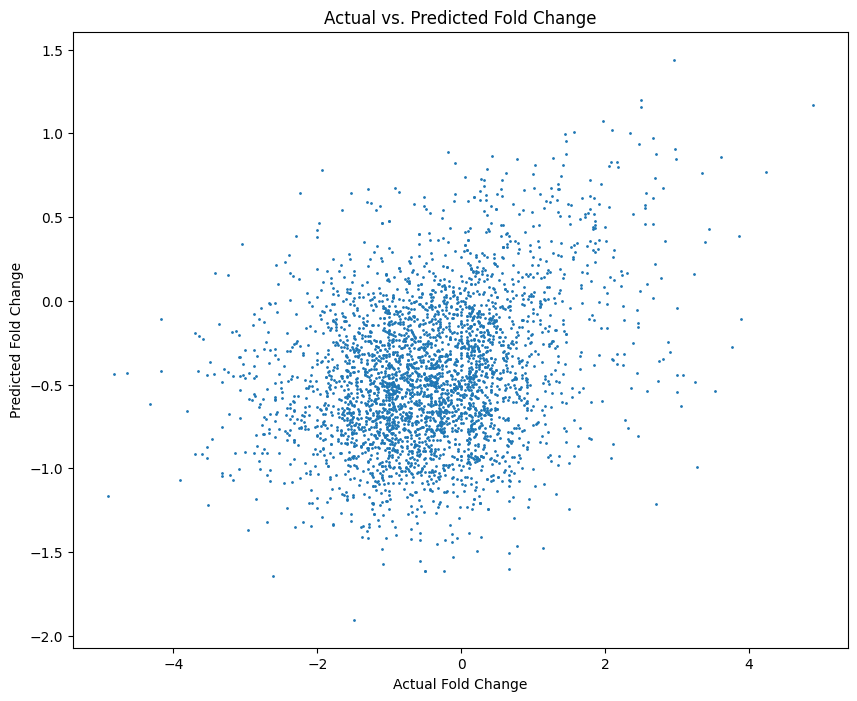

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()

Mean Squared Error: 1.1401837361430947
MAE Score: 0.8225230617257396
R2 Score: 0.07905372136735123


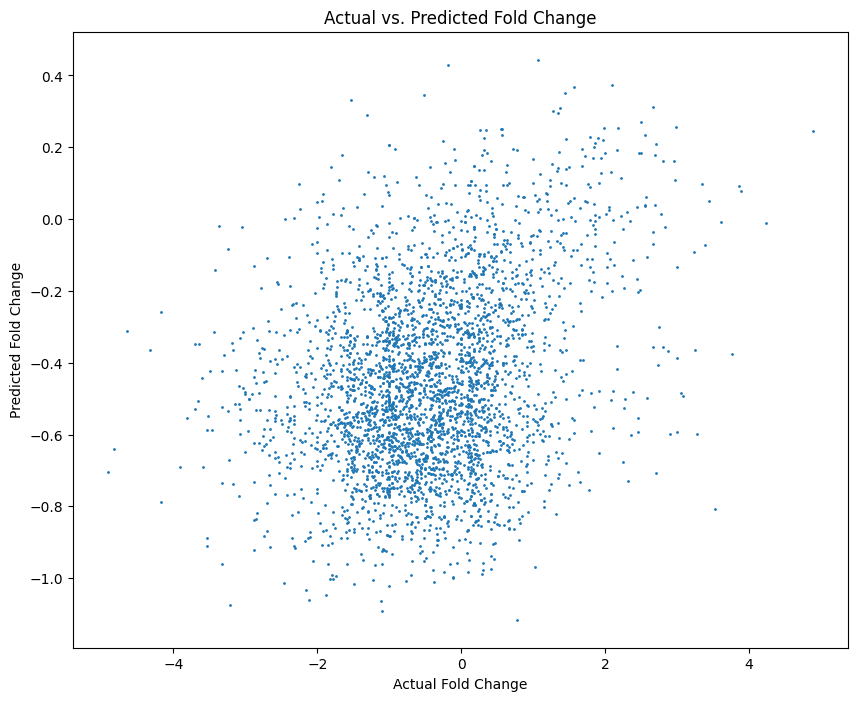

In [ ]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE Score: {mae}')

r2_score = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score}')


plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()

Mean Squared Error (MSE): 1.0562418535031086
MAE Score: 0.7435392723986336
R-squared (R2): 0.14685504319660037


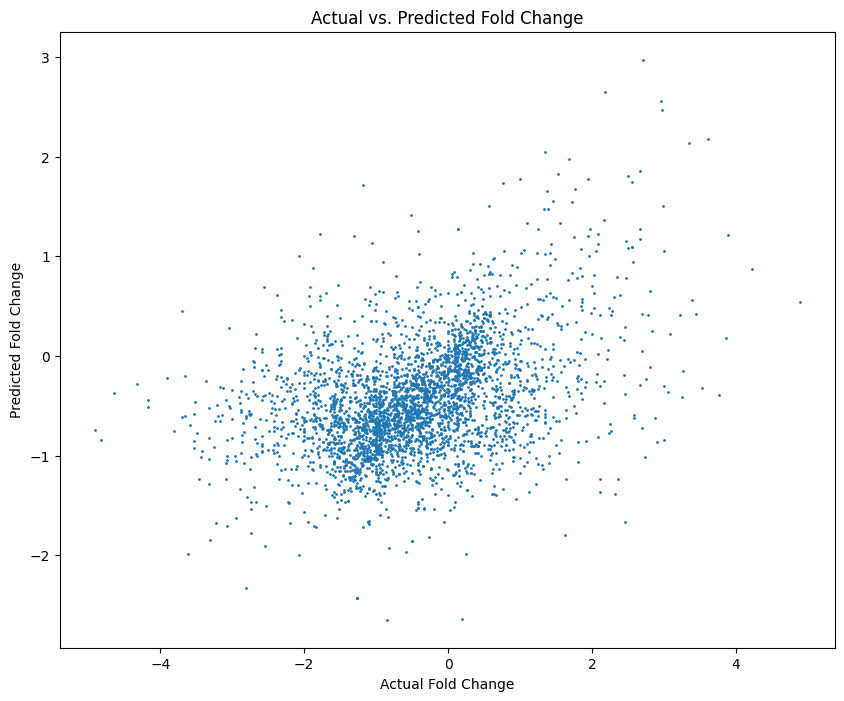

In [ ]:

# Create an XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using different metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')

print(f'MAE Score: {mae}')
print(f'R-squared (R2): {r2}')


plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()


## Try Grid Search For Best Downsampled xgboost Model

In [ ]:
# Create an XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
}

# Define the mean squared error as the scoring metric for optimization
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring=mse_scorer, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model using different metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics for the best model
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score: {explained_variance}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Squared Error (MSE): 1.015006194139441
R-squared (R2): 0.18016180405813853
Explained Variance Score: 0.18016376350956442


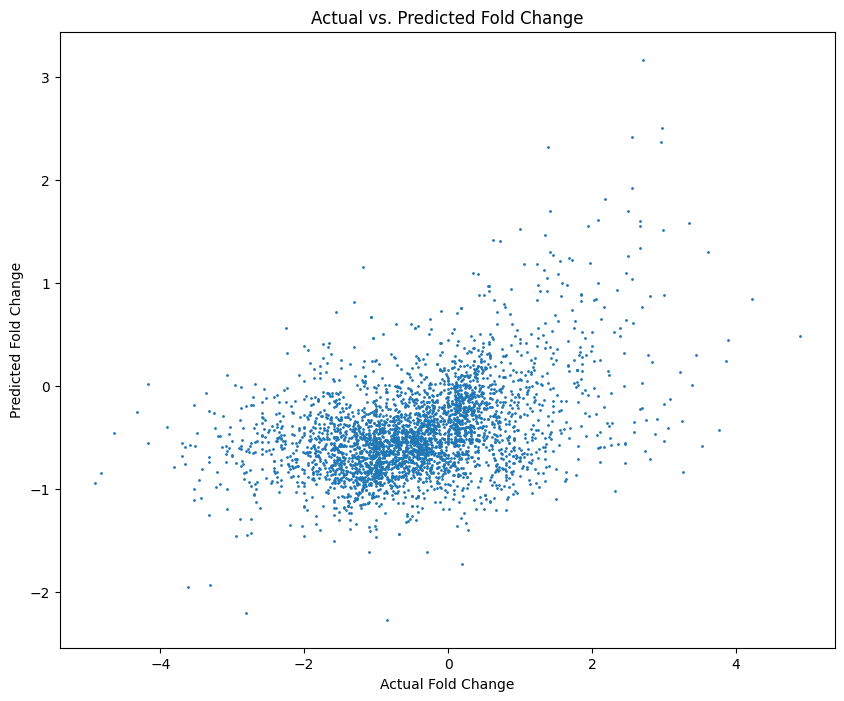

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()


Mean Squared Error (MSE): 1.0169043211215592
R-squared (R2): 0.1838034307175378


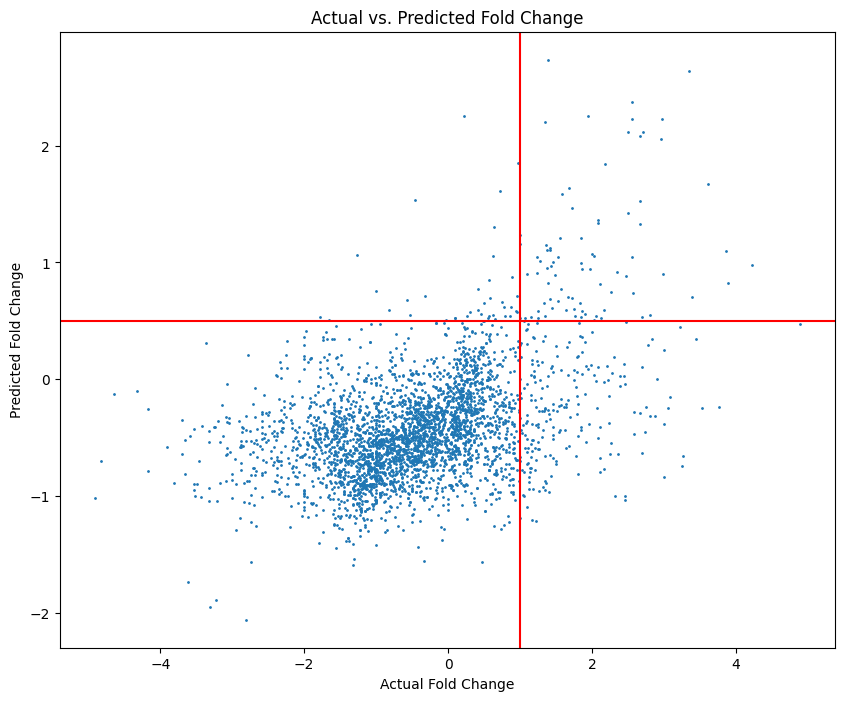

True Pos: 81
False Neg: 214
True Neg: 3139
False Pos: 39
True Positive Rate: 0.37850467289719625
Precision: 0.675
Recall: 0.2745762711864407
Specificity: 0.987728130899937
Sensitivity: 0.2745762711864407


In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Cutoff values
cutoff_y = 1
cutoff_x = 0.5

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.axhline(y=cutoff_x, color='r', linestyle='-')
plt.axvline(x=cutoff_y, color='r', linestyle='-')
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()



y_test_np = np.array(y_test)
# Calculate the number of points in each quadrant
TP = np.sum((y_test_np >= cutoff_y) & (y_pred >= cutoff_x))
FP = np.sum((y_test_np < cutoff_y) & (y_pred >= cutoff_x))
TN = np.sum((y_test_np < cutoff_y) & (y_pred < cutoff_x))
FN = np.sum((y_test_np >= cutoff_y) & (y_pred < cutoff_x))

# Print the results
print(f"True Pos: {TP}")
print(f"False Neg: {FN}")
print(f"True Neg: {TN}")
print(f"False Pos: {FP}")


TPR = TP/FN
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = TN/(TN+FP)
sens = TP/(TP+FN)

# Print the calculated values
print(f"True Positive Rate: {TPR}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")

## Downsampled random forest regression

Mean Squared Error (MSE): 0.9748043668423592
R-squared (R2): 0.21828803595487556


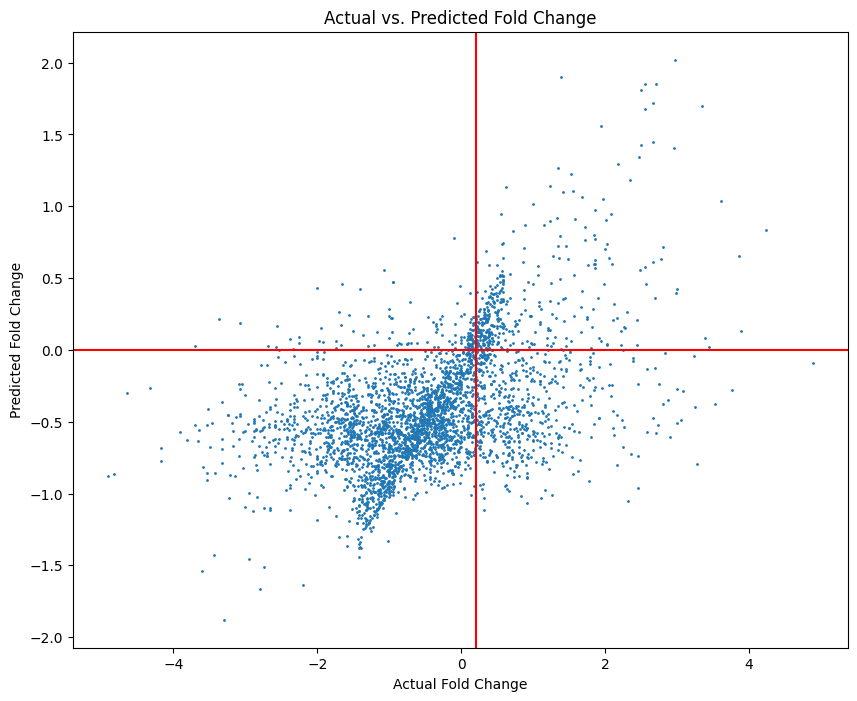

In [ ]:


# Instantiate the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the best model using different metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, s=1)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axvline(x=0.2, color='r', linestyle='-')
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change')
plt.show()

In [ ]:
# Cutoff values
cutoff_y = 0.2
cutoff_x = 0.0
y_test_np = np.array(y_test)
# Calculate the number of points in each quadrant
TP = np.sum((y_test_np >= cutoff_y) & (y_pred >= cutoff_x))
FP = np.sum((y_test_np < cutoff_y) & (y_pred >= cutoff_x))
TN = np.sum((y_test_np < cutoff_y) & (y_pred < cutoff_x))
FN = np.sum((y_test_np >= cutoff_y) & (y_pred < cutoff_x))

# Print the results
print(f"True Pos: {TP}")
print(f"False Neg: {FN}")
print(f"True Neg: {TN}")
print(f"False Pos: {FP}")

True Pos: 375
False Neg: 548
True Neg: 2414
False Pos: 136


In [ ]:
TPR = TP/FN
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = TN/(TN+FP)
sens = TP/(TP+FN)

# Print the calculated values
print(f"True Positive Rate: {TPR}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")

True Positive Rate: 0.6843065693430657
Precision: 0.7338551859099804
Recall: 0.40628385698808234
Specificity: 0.9466666666666667
Sensitivity: 0.40628385698808234
